In [1]:
import sys
 
# add python folder
sys.path.insert(0, 'python')

from embeddingStructure import embeddingStructure
from batch import batch
import utils as cSim

import logging
import time
import threading
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from tabulate import tabulate
import plotly.express as px

 

In [2]:
# Log
format = "%(asctime)s: %(message)s"
logging.basicConfig(format=format, level=logging.INFO, datefmt="%H:%M:%S")
logging.info("Main    : Starting")

12:09:50: Main    : Starting


In [3]:
# Create batches
filename = "/home/ubuntu/sampled_embeddings.csv"

batch_01 = batch()
batch_02 = batch()
batch_03 = batch()
batch_04 = batch()

print("---- batch 04 -----")
batch_04.load(filename, 1, 10000)

print("---- batch 03 -----")
batch_03.load(filename, 1, 1000)

print("---- batch 02 -----")
batch_02.load(filename, 1, 100)

print("---- batch 01 -----")
batch_01.load(filename, 1, 10)


12:09:52: batch    : starting section
12:09:52: batch    : line found


---- batch 04 -----


12:09:56: batch    : section done
12:09:56: batch    : starting section
12:09:56: batch    : line found


---- batch 03 -----


12:09:57: batch    : section done
12:09:57: batch    : starting section
12:09:57: batch    : line found
12:09:57: batch    : section done
12:09:57: batch    : starting section
12:09:57: batch    : line found
12:09:57: batch    : section done


---- batch 02 -----
---- batch 01 -----


In [5]:
# print info about batches
logging.info("Main    : all done")
print( len(batch_01.items))
print( len(batch_02.items))
print( len(batch_03.items))
print( len(batch_04.items))

09:29:46: Main    : all done


9
99
999
9999


In [6]:
# All vs all cosine similarity on all entries -  later we do them on features only
batches = [batch_01,batch_02,batch_03,batch_04]
simMatrix = [np.empty((len(batch_01.items), len(batch_01.items)), dtype=np.float16), 
            np.empty((len(batch_02.items), len(batch_02.items)), dtype=np.float16),
            np.empty((len(batch_03.items), len(batch_03.items)), dtype=np.float16),
            np.empty((len(batch_04.items), len(batch_04.items)), dtype=np.float16)]

# This stores the times
AllTimes = [0,0,0,0]
OneAllTimes = [0,0,0,0]
OneOneTimes = [0,0,0,0]

# loop through all batch sizes
for i in range(len(batches)):
    AllTimes[i] = time.time()
    matrixVal = simMatrix[i]
    
    # all vs all
    for j in tqdm(range(len(batches[i].items)), leave=True):
        # 1 vs all
        OneAllTimes[i] = time.time()
        for k in range(len(batches[i].items)):
            # 1 vs 1
            OneOneTimes[i] = time.time()
            matrixVal[j,k] = cSim.cosineSimilarity(batches[i].items[j].data,batches[i].items[k].data)
            OneOneTimes[i] = time.time() - OneOneTimes[i]
        OneAllTimes[i] = time.time() - OneAllTimes[i]
    AllTimes[i] = time.time() - AllTimes[i]

AllTimes.append("All vs. All")
OneAllTimes.append("One vs. All")
OneOneTimes.append("One vs. One")


 40%|███▉      | 399/999 [00:05<00:07, 76.32it/s]


KeyboardInterrupt: 

In [62]:
print(tabulate([AllTimes,OneAllTimes,OneOneTimes], 
headers=["batch_1","batch_2","batch_3","batch_4","type"]))

    batch_1      batch_2       batch_3         batch_4  type
-----------  -----------  ------------  --------------  -----------
0.00620723   0.146036     13.5511       1383.06         All vs. All
0.000123024  0.00110531    0.0129561       0.131777     One vs. All
1.28746e-05  1.07288e-05   1.07288e-05     1.28746e-05  One vs. One


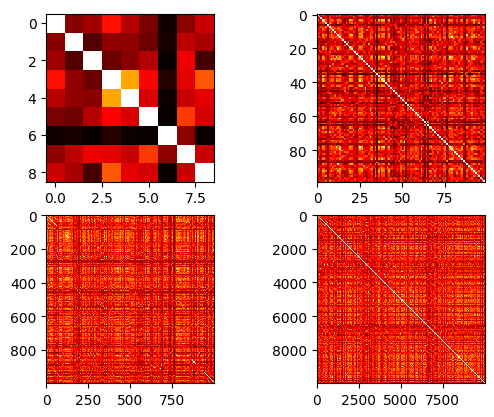

In [63]:
a = np.random.random((16, 16))

plt.subplot(2,2,1)
plt.imshow(simMatrix[0], cmap='hot', interpolation='nearest')
plt.subplot(2,2,2)
plt.imshow(simMatrix[1], cmap='hot', interpolation='nearest')
plt.subplot(2,2,3)
plt.imshow(simMatrix[2], cmap='hot', interpolation='nearest')
plt.subplot(2,2,4)
plt.imshow(simMatrix[3], cmap='hot', interpolation='nearest')


plt.show()

In [64]:
for item in simMatrix:
    print("matrix Size: " + str(len(item)) + 
          " | min: " + str(min(map(min, item))) +
          " | max: " + str(max(map(max, item))))

matrix Size: 9 | min: 0.2178 | max: 1.0
matrix Size: 99 | min: 0.0555 | max: 1.0
matrix Size: 999 | min: 0.01041 | max: 1.0
matrix Size: 9999 | min: -0.004025 | max: 1.0


In [13]:
# Use parallax for justifying the use of clustering or PCA/LDA
batchMatrix = np.empty((len(batch_01.items), 25))

for i in range(len(batch_01.items) - 5 ):
    batchMatrix[i,:] = batch_01.items[i].data[25:50]

batchDF = pd.DataFrame(data = batchMatrix)
fig = px.parallel_coordinates(batchDF,color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=0)
fig.show()

/home/ubuntu/.local/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

